In [1]:
import io, os, sys, types
from IPython import get_ipython
from nbformat import current
from IPython.core.interactiveshell import InteractiveShell
def find_notebook(fullname, path=None):
    """find a notebook, given its fully qualified name and an optional path

    This turns "foo.bar" into "foo/bar.ipynb"
    and tries turning "Foo_Bar" into "Foo Bar" if Foo_Bar
    does not exist.
    """
    name = fullname.rsplit('.', 1)[-1]
    if not path:
        path = ['']
    for d in path:
        nb_path = os.path.join(d, name + ".ipynb")
        if os.path.isfile(nb_path):
            return nb_path
        # let import Notebook_Name find "Notebook Name.ipynb"
        nb_path = nb_path.replace("_", " ")
        if os.path.isfile(nb_path):
            return nb_path


class NotebookLoader(object):
    """Module Loader for Jupyter Notebooks"""
    def __init__(self, path=None):
        self.shell = InteractiveShell.instance()
        self.path = path

    def load_module(self, fullname):
        """import a notebook as a module"""
        path = find_notebook(fullname, self.path)

        print ("importing Jupyter notebook from %s" % path)

        # load the notebook object
        with io.open(path, 'r', encoding='utf-8') as f:
            nb = current.read(f, 'json')


        # create the module and add it to sys.modules
        # if name in sys.modules:
        #    return sys.modules[name]
        mod = types.ModuleType(fullname)
        mod.__file__ = path
        mod.__loader__ = self
        mod.__dict__['get_ipython'] = get_ipython
        sys.modules[fullname] = mod

        # extra work to ensure that magics that would affect the user_ns
        # actually affect the notebook module's ns
        save_user_ns = self.shell.user_ns
        self.shell.user_ns = mod.__dict__

        try:
            for cell in nb.worksheets[0].cells:
                if cell.cell_type == 'code' and cell.language == 'python':
                # transform the input to executable Python
                    code = self.shell.input_transformer_manager.transform_cell(cell.input)
                # run the code in themodule
                    exec(code, mod.__dict__)
        finally:
            self.shell.user_ns = save_user_ns
        return mod


class NotebookFinder(object):
    """Module finder that locates Jupyter Notebooks"""
    def __init__(self):
        self.loaders = {}

    def find_module(self, fullname, path=None):
        nb_path = find_notebook(fullname, path)
        if not nb_path:
            return

        key = path
        if path:
            # lists aren't hashable
            key = os.path.sep.join(path)

        if key not in self.loaders:
            self.loaders[key] = NotebookLoader(path)
        return self.loaders[key]

sys.meta_path.append(NotebookFinder())

/software/python-anaconda-2020.02-el7-x86_64/lib/python3.7/site-packages/nbformat/current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)


importing Jupyter notebook from IceCubeAnalysis2.ipynb
Number of Sources:	 65
Number of Events:	 1134450
Using parallel, time passed was: 	 4.868853
Number of Sources:	 65
Number of Events:	 1134450
Using parallel, time passed was: 	 4.733972
Number of Sources:	 65
Number of Events:	 1134450
Using parallel, time passed was: 	 4.771075
Number of Sources:	 65
Number of Events:	 1134450
Using parallel, time passed was: 	 4.724693
Number of Sources:	 65
Number of Events:	 1134450
Using parallel, time passed was: 	 4.751379
Number of Sources:	 65
Number of Events:	 1134450
Using parallel, time passed was: 	 4.730481
Number of Sources:	 65
Number of Events:	 1134450
Using parallel, time passed was: 	 4.726625
Number of Sources:	 65
Number of Events:	 1134450
Using parallel, time passed was: 	 4.726789
nonblazar agn, Nocut


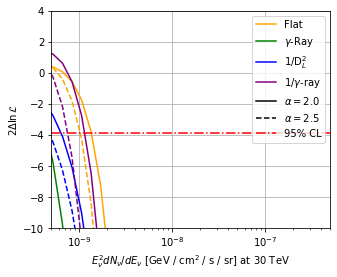

Number of Sources:	 47
Number of Events:	 1134450
Using parallel, time passed was: 	 3.498197
Number of Sources:	 47
Number of Events:	 1134450
Using parallel, time passed was: 	 3.531601
Number of Sources:	 47
Number of Events:	 1134450
Using parallel, time passed was: 	 3.565570
Number of Sources:	 47
Number of Events:	 1134450
Using parallel, time passed was: 	 3.626738
Number of Sources:	 47
Number of Events:	 1134450
Using parallel, time passed was: 	 3.510984
Number of Sources:	 47
Number of Events:	 1134450
Using parallel, time passed was: 	 3.499484
Number of Sources:	 47
Number of Events:	 1134450
Using parallel, time passed was: 	 3.542704
Number of Sources:	 47
Number of Events:	 1134450
Using parallel, time passed was: 	 3.568629
nonblazar agn, non_var


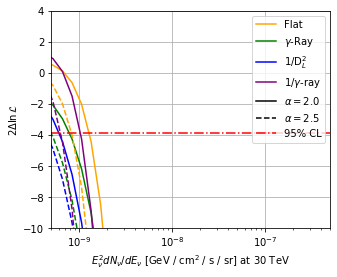

Number of Sources:	 2796
Number of Events:	 1134450
Using parallel, time passed was: 	 91.271990
Number of Sources:	 2796
Number of Events:	 1134450
Using parallel, time passed was: 	 89.335235
Number of Sources:	 2796
Number of Events:	 1134450
Using parallel, time passed was: 	 89.404144
Number of Sources:	 2796
Number of Events:	 1134450
Using parallel, time passed was: 	 86.937784
Number of Sources:	 2796
Number of Events:	 1134450
Using parallel, time passed was: 	 89.670485
Number of Sources:	 2796
Number of Events:	 1134450
Using parallel, time passed was: 	 89.025904
Number of Sources:	 2796
Number of Events:	 1134450
Using parallel, time passed was: 	 88.258668
Number of Sources:	 2796
Number of Events:	 1134450
Using parallel, time passed was: 	 85.959082
blazar agn, Nocut


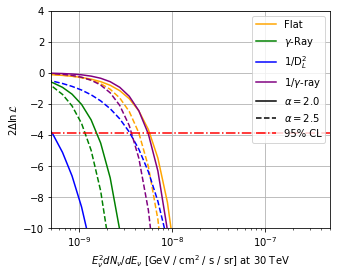

Number of Sources:	 1674
Number of Events:	 1134450
Using parallel, time passed was: 	 54.726067
Number of Sources:	 1674
Number of Events:	 1134450
Using parallel, time passed was: 	 54.077240
Number of Sources:	 1674
Number of Events:	 1134450
Using parallel, time passed was: 	 54.438322
Number of Sources:	 1674
Number of Events:	 1134450
Using parallel, time passed was: 	 52.415182
Number of Sources:	 1674
Number of Events:	 1134450
Using parallel, time passed was: 	 54.589568
Number of Sources:	 1674
Number of Events:	 1134450
Using parallel, time passed was: 	 54.121293
Number of Sources:	 1674
Number of Events:	 1134450
Using parallel, time passed was: 	 54.158134
Number of Sources:	 1674
Number of Events:	 1134450


In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool
import IceCubeAnalysis2


def main(icecube_file_name, background_file_name, catalog_file_name, source_class_names,
         alpha=2.0, weights_type='flat', n_cpu=10, var_index_cut=None):
    """
    For points in the sky from the 4LAC catalog, the function scans
    over the number of neutrinos in the data from the source class
    and calculates the likelihood. The number of neutrinos associated
    to each source in the source class is determined by a weighting,
    which is described in more detail in the paper. If a statistically
    significant number of tracks in the data are associated with this
    source class, the resulting likelihood will peak above 3sigma.
    Parameters
    ----------
    icecube_file_name : str
        File location of pickled IceCube track data.
    background_file_name : str
        File location of pre-processed background PDF.
    catalog_file_name : str
        File location of pickled 4LAC catalog.
    source_class_names : array_like
        Names of source classes used in calculation.
    alpha : float
        Neutrino energy spectrum integrated with the effective area.
    weights_type : str
        The weighting used for the source class. Options are 'flat' for
        equal weight, 'flux' to weight against the gamma-ray flux, and
        'dist' to weight against the luminosity distance.
    n_cpu : int
        The number of CPUs to use in the parallelization.
        If n_cpu is None, the computation is not parallelized.
    var_index_cut : float
        Removes events that have a variability index greater
        than var_index_cut. If None, no cut is performed.
    Returns
    ----------
    sweep_flux : array
        The array of fluxes of astrophysical neutrinos used
        to calculate the likelihood of the source class
        producing said astrophysical neutrino flux.
    sweep_ts : array
        The cumulative likelihood of the source class producing
        the flux of astrophysical neutrinos.
    sweep_ts_each_source : array
        The likelihood of each individual source producing
        the flux of astrophysical neutrinos.
    """

    if(n_cpu is not None):
        use_parallel = True
    else:
        use_parallel = False
        
    sourcesearch_ = IceCubeAnalysis2.SourceSearch(icecube_file_name)
    sourcesearch_.load_background(background_file_name)

    # The time used in integration, in seconds
    T = (10.0 * 365.25 * 24.0 * 3600.0)

    # The energy bounds used in integration.
    E1 = 100.0
    E2 = 30.0

    Aeff_filename = "./processed_data/output_icecube_AffIntegrated_%s.npz" % alpha
    class_search = IceCubeAnalysis2.SourceClassSearch(T, E1, E2, alpha, sourcesearch_, Aeff_filename)

    
    class_search.load_4lac(catalog_file_name, source_class_names, weights_type)

    if(var_index_cut is not None):
        class_search.var_index_cut(var_index_cut)

    print("Number of Sources:\t %i" % class_search.N)
    print("Number of Events:\t %i" % sourcesearch_.N)

    start_time = time.time()

    if(use_parallel):
        args_for_multiprocessing = np.arange(class_search.N)

        pool = Pool(n_cpu)
        parallel_results = pool.map(class_search.source_loop,
                                    args_for_multiprocessing)
        pool.close()

        parallel_results = [list(t) for t in zip(*parallel_results)]

        sweep_ts_each_source = np.stack(parallel_results[1], axis=1)
        sweep_ts = np.sum(parallel_results[1], axis=0)
        sweep_flux = np.sum(parallel_results[0], axis=0)
    else:
        # Calculate the points that we will then loop over
        parameterized_span = class_search.calculate_span()

        sweep_ts = np.zeros(len(parameterized_span))
        sweep_flux = np.zeros(len(parameterized_span))
        sweep_ts_each_source = np.zeros((len(parameterized_span), class_search.N))

        for i_source in range(class_search.N):
            sweep_fluxes_, ts_results_ = class_search.source_loop(i_source)

            sweep_flux += sweep_fluxes_
            sweep_ts += ts_results_
            sweep_ts_each_source[:, i_source] = ts_results_

    end_time = time.time()

    if(use_parallel):
        print("Using parallel, time passed was: \t %f" % (end_time - start_time))
    else:
        print("Using nonparallel, time passed was: \t %f" % (end_time - start_time))

    sweep_flux *= 1000.0  # convert TeV to GeV

    return sweep_flux, sweep_ts, sweep_ts_each_source


if(__name__ == "__main__"):

    catalog_file_name = "./processed_data/4LAC_catelogy.npz"
    icecube_file_name = "./processed_data/output_icecube_data.npz"
    background_file_name = "./processed_data/output_icecube_background_count.npz"

    output_file_preamble = ['nonblazar','blazar']
    cut_type = ['Nocut','non_var']
    blazar = ['BLL', 'bll', 'FSRQ', 'fsrq', 'BCU', 'bcu']
    nonblazar = ['RDG', 'rdg', 'AGN', 'agn', 'NLSY1', 'nlsy1','CSS','css','SSRQ','ssrq','SEY','sey']
    source_class_names = [nonblazar, blazar]
    
    weights_types = ['flat', 'flux', 'dist','inv_flux']
    colors = ['orange', 'green', 'blue','purple']
    labels = ['Flat', r'$\gamma$-Ray', r'1/D$_L^2$',r'1/$\gamma$-ray']
    var_cut_types = [None, 18.48]

    alphas = [2.0, 2.5]
    linestyles = ['-', '--']

    for i_source_class_names, source_class_name in enumerate(source_class_names):
    
        for i_var_cut_types, var_cut_type in enumerate(var_cut_types):

            plt.figure(figsize=(5, 4))

            for i_alpha, alpha in enumerate(alphas):

                for i_weights_type, weights_type in enumerate(weights_types):
                    sweep_flux, sweep_ts, sweep_ts_each_source = main(icecube_file_name=icecube_file_name,
                                                                      background_file_name=background_file_name,
                                                                      catalog_file_name=catalog_file_name,
                                                                      source_class_names=source_class_name,
                                                                      alpha=alpha,
                                                                      weights_type=weights_type,
                                                                      n_cpu=10,
                                                                      var_index_cut=var_cut_type)

                    np.savez("./processed_data/limit_analysis_data/output_analysis_%s_%s_alpha%.1f_%s_limit.npz" % (output_file_preamble[i_source_class_names], cut_type[i_var_cut_types], alpha, weights_type),
                             flux_span=sweep_flux, results=sweep_ts)

                    plt.semilogx(np.array(sweep_flux)[sweep_ts < 1e3],
                                 sweep_ts[sweep_ts < 1e3],
                                 linestyle=linestyles[i_alpha],
                                 color=colors[i_weights_type])            

            for i_weights_type, weights_type in enumerate(weights_types):
                plt.plot([], [], color=colors[i_weights_type], label=labels[i_weights_type])

            for i_alpha, alpha in enumerate(alphas):
                plt.plot([], [], color='black', linestyle=linestyles[i_alpha], label=r"$\alpha=$" + str(alpha))

            plt.axhline(-3.85,
                        color="red",
                        linestyle="-.",
                        label="95% CL")

            plt.xlabel(r"$E^2_\nu dN_\nu/dE_\nu$ [GeV / cm$^2$ / s / sr] at 30 TeV")
            plt.ylabel("$2 \Delta \ln \mathcal{L}$")
            plt.xlim(5e-10, 5e-7)
            plt.ylim(-10.0, 4.0)
            plt.grid()
            plt.legend()

            #plt.savefig("./plots/A05_analyze_source_classes_limits_%s_%s_cut.png"%(output_file_preamble[i_source_class_names],cut_type[i_var_cut_types]), dpi=300)
            print('%s agn, %s' % (output_file_preamble[i_source_class_names],cut_type[i_var_cut_types]))
            plt.show()